# Ejercicios de NumPy 

In [1]:
%pylab inline
import math
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Pregunta 1

Crea los siguientes arreglos con los tipos correctos. 

- Un arreglo de $5 \times 5$ cuya diagonal sean $[2.0, 3.0, 4.0, 5.0]$
- Un arreglo de $4 \times 4$ cuyo último renglón sea $[1,2,3,4]$ y el resto sean $0$.

In [3]:
arr = np.eye(5)

for i in range(5):
    arr[i, i] = i + 1
    
print(arr)

[[1. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 5.]]


In [4]:
arr1 = np.zeros((4,4))

arr1[3] = [1,2,3,4]

print(arr1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 2. 3. 4.]]


## Pregunta 2

En este ejercicio realizaremos una [**criba de Eratóstenes**](http://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

(a) Crea un arreglo de booleanos de **shape** `(100,)`, con todos sus elementos `True`.  El índice representa el número.

In [4]:
bool_arr = np.ones((100), dtype=bool)
print(bool_arr)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


(b) "Tacha" los elementos `0` y `1`.

In [5]:
#Hacemos un slicing
bool_arr_slice = bool_arr[0:2]
print(bool_arr_slice)

[ True  True]


In [6]:
#Hacemos los 2 primeros elementos 'Falso' haciendo un slicing
bool_arr_slice[0:2] = np.logical_not(bool_arr_slice)
print(bool_arr_slice)

[False False]


In [7]:
print(bool_arr)

[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


(c) Para cada entero subsiguiente, tacha sus múltiplos. Una manera de hacerlo es el código que se muestra. Explica que hace el código, sobretodo explica que hace el *slicing*.

In [8]:
N_max = int(np.sqrt(len(bool_arr)))

# Vayamos de adentro hacia afuera.
# len(bool_arr) = nos dice la longitud del arreglo
# np.sqrt(...) = saca la raíz de la longitux del arreglo
# int(...) = convertimos a entero la raíz

# Con lo que concluímos que 'N_max es el máximo calor que tomarán los múltiplos'
# print(N_max) = 10

for j in range(2, N_max):

# Esto nos dice que la j irá desde el número 2, porque ya "tachamos" el 0 y 1
# y que llegará a uno antes del máximo (= 10)

    bool_arr[2*j::j] = False

# Tenemos un slicing, en el que [2*j::j] nos dice que:
    # va a comenzar en el j*2 (para que no se elimine el primo)
    # va a terminar el recorrido en toda la lista
    # va a ir 'saltando' de j en j 
    # los va a convertir en False
    # es decir, va a hacer los múltiplos de j False

In [9]:
bool_arr

array([False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False])

(d) Mira la documentacion de `np.nonzero` para imprimir todos los números primos.

In [10]:
np.nonzero?
# Regresa los índices de los elementos que NO son cero(0)

In [11]:
np.nonzero(bool_arr)

(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
        61, 67, 71, 73, 79, 83, 89, 97]),)

(e) Encapsula lo que acabamos de hacer en una función llamada `criba_eratostenes`, que reciba como argumento `maximo` el cual representa el tamaño del `array`. Muestra el resultado para `maximo = {10, 100, 200}`, usando un `for`.

In [12]:
def criba_eratostenes(max):
    bool_arr = np.ones((max), dtype=bool)
    bool_arr_slice = bool_arr[0:2]
    bool_arr_slice[0:2] = np.logical_not(bool_arr_slice)
    N_max = int(np.sqrt(len(bool_arr)))
    
    for j in range(2, N_max):
        bool_arr[2*j::j] = False
    return np.nonzero(bool_arr)

In [13]:
l = [10,100,200]

[criba_eratostenes(i) for i in l]

[(array([2, 3, 5, 7, 9]),),
 (array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
         61, 67, 71, 73, 79, 83, 89, 97]),),
 (array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
          43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
         103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
         173, 179, 181, 191, 193, 197, 199]),)]

In [14]:
l = [10,100,200]

for i in l:
    print(criba_eratostenes(i))

(array([2, 3, 5, 7, 9]),)
(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97]),)
(array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199]),)


## Pregunta 3

Crea un [cubo rubik](http://en.wikipedia.org/wiki/Rubik%27s_Cube), partiendo de un arreglo de ceros y usando *slicing* dibuja cada una de las caras como si estuviera resuelto (cada color un entero a partir del $1$). Muestra con *indexing* que está resuelto (es decir, imprime las seis caras). ¿Cuántos elementos del arreglo quedaron en $0$?

In [6]:
cubo = np.zeros((6,3,3)).astype(int)
print(cubo)

[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


In [7]:
# IDEA
for i in list(range(1,7)):
    print(i)

1
2
3
4
5
6


In [9]:
for i in range(len(cubo)):
    cubo[i] = i + 1
print(cubo)

[[[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]]

 [[4 4 4]
  [4 4 4]
  [4 4 4]]

 [[5 5 5]
  [5 5 5]
  [5 5 5]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]]]


In [18]:
# Ningún elemento quedó en cero ya que se le asignó un entero a partir de 1 (range(1,7))

## Pregunta 5

Utiliza el archivo `sunspots.txt` (localizado en la carpeta `data`), el cual contiene el número de manchas solares por cada mes desde enero de 1749. La primera columna es el mes, el segundo el número de manchas.

In [12]:
import matplotlib.pyplot as plt

(a) Escribe el código que lea el archivo y haga una gráfica de las manchas en función del tiempo. Formatea el eje $x$ para que se muestren cada 25 años empezando en $1750$. 

[58.0, 46.8, 1.6, 21.7, 157.0, 60.8, 19.5, 0.5, 119.1, 27.6, 62.0]
[1750, 1775, 1800, 1825, 1850, 1875, 1900, 1925, 1950, 1975, 2000]


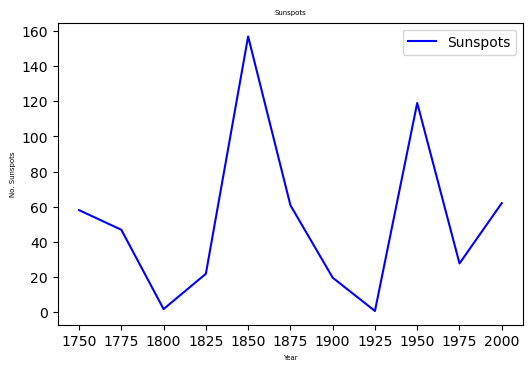

In [16]:
mes, man = np.loadtxt('Data/sunspots.txt', unpack=True, dtype = float, delimiter='\t', usecols = [0,1])

#Notemos que el problema nos pide que enseñemos los datos de las manchas cada 25 años. 12 meses * 25 años = 300

    #Datos de las manchas
manchas = []

for i in range(0,len(man),300):
    manchas.append(man[i])

print(manchas)

    #Datos de los años
year = []
a = [int((i/12) + 1750) for i in range(0,len(mes), 300)]

for i in a:
    year.append(i)

print(year)

plt.figure(figsize=(6, 4), dpi=100)
plt.subplot(1, 1, 1)
plt.xticks(year)
plt.plot(year, manchas, color = 'blue', linewidth=1.5, linestyle="-", label = 'Sunspots')
plt.title('Sunspots', fontsize = 5)
plt.xlabel('Year', fontsize = 5)
plt.ylabel('No. Sunspots', fontsize = 5)
plt.legend(loc = 'upper right')

<div class="alert alert-warning">
**NOTA:** La gráfica debe de estar en calidad de publicación.
</div>

## Pregunta 6

Utiliza el archivo `starts.txt` (localizado en la carpeta `data`), el cual contiene la temperatura y magnitud de varias estrellas en la Vía Lactea.  Usa esta información para dibujar un **scatter plot** del logaritmo del brillo vs. la temperatura (en **K**). Este diagrama se conoce como diagrama de [Hertzsprung-Russell](http://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram). 

(a) Lee el archivo y dibuja los datos tal como vienen en el archivo. Agrega etiquetas y formatea la gráfica de tal manera que tenga calidad de publicación.

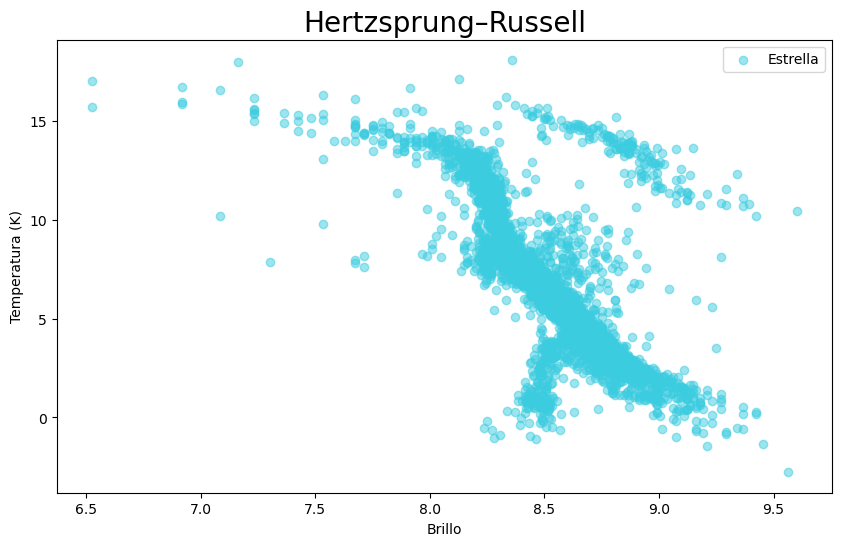

In [18]:
tem, mag = np.loadtxt('Data/stars.txt', unpack=True, dtype = float, delimiter=' ', usecols = [0,1])
plt.figure(figsize=(10, 6), dpi=100)
plt.subplot(1, 1, 1)
plt.scatter(np.log(tem), mag, color = (.23, .8, .88), alpha = .5, label = 'Estrella')

plt.title("Hertzsprung–Russell", fontsize = 20)
plt.xlabel('Brillo', fontsize = 10)
plt.ylabel('Temperatura (K)', fontsize = 10)
plt.legend(loc = 'upper right')